<a href="https://colab.research.google.com/github/superishi/Cybersecurity-Flow-Anomaly-Detection/blob/main/weekendTimeSeriesClusteringhourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_day(time_string):
  day_string = time_string[:10]
  return day_string

In [ ]:
extract_day("2021-08-28")

'28'

In [ ]:
def transform_day(day_time):
  day = extract_day(day_time)
  if day >= 23:
    return (day - 23) * 3 +
  else:
    return (day + 8) * 3 +

In [ ]:
extract_day("2021-08-23 15:00:00")

'23'

### 28, 29, 4, 5 are the weekends

In [ ]:
origData = pd.read_csv("/content/drive/MyDrive/DATA3001 Cyber/ReducedHourly.csv", header = 0)
#print(origData)
origData['edit_time'] = origData['time'] 
origData['edit_time'] = origData['edit_time'].apply(extract_day)
origData = origData[origData.edit_time.isin(["2021-08-28", "2021-08-29", "2021-09-04", "2021-09-05"])] 
#origData = origData.drop(origData[origData.edit_time == "2021-08-29"].index )
#origData = origData.drop(origData[origData.edit_time == "2021-09-04"].index )
#origData = origData.drop(origData[origData.edit_time == "2021-09-05"].index )
print(origData)

                       time   device_mac  ...        v3   edit_time
105     2021-08-28 00:00:00  21:fa:27:56  ...  0.000000  2021-08-28
106     2021-08-28 01:00:00  21:fa:27:56  ...  0.000000  2021-08-28
107     2021-08-28 02:00:00  21:fa:27:56  ...  0.000000  2021-08-28
108     2021-08-28 03:00:00  21:fa:27:56  ...  0.000000  2021-08-28
109     2021-08-28 04:00:00  21:fa:27:56  ...  0.000000  2021-08-28
...                     ...          ...  ...       ...         ...
254036  2021-09-05 19:00:00  ee:dd:4f:cd  ... -0.000225  2021-09-05
254037  2021-09-05 20:00:00  ee:dd:4f:cd  ... -0.000225  2021-09-05
254038  2021-09-05 21:00:00  ee:dd:4f:cd  ... -0.000225  2021-09-05
254039  2021-09-05 22:00:00  ee:dd:4f:cd  ... -0.000224  2021-09-05
254040  2021-09-05 23:00:00  ee:dd:4f:cd  ... -0.000225  2021-09-05

[72384 rows x 7 columns]


In [ ]:
#origData = pd.read_csv("/content/drive/MyDrive/DATA3001 Cyber/by3hours.csv", header = 0)
#origData['time'] = origData['time'].apply(transform_day)
#pd.set_option('display.max_rows', 30)
#print(origData)


       time   device_mac        v0        v1        v2        v3
0         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
1         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
2         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
3         9  21:fa:27:56  0.003341  0.942905 -0.278402 -0.181697
4         9  21:fa:27:56  0.003341  0.942907 -0.278401 -0.181683
...     ...          ...       ...       ...       ...       ...
85187     9  ee:dd:4f:cd  0.999949 -0.004249 -0.002584 -0.000430
85188     9  ee:dd:4f:cd  0.999954 -0.003726 -0.000910 -0.000527
85189     9  ee:dd:4f:cd  0.999952 -0.003872 -0.001447 -0.000458
85190     9  ee:dd:4f:cd  0.999936 -0.004898 -0.005163 -0.000095
85191     9  ee:dd:4f:cd  0.999939 -0.004795 -0.004678 -0.000181

[85192 rows x 6 columns]


In [ ]:
origData2 = origData.groupby(['device_mac']).agg(tuple).applymap(list).reset_index()

In [ ]:
origData.iloc[11235:11250,:]

,time,device_mac,v0,v1,v2,v3,edit_time
39573,2021-08-28 03:00:00,bd:0d:af:0f,0.000000,0.000000,0.000000,0.000000,2021-08-28
39574,2021-08-28 04:00:00,bd:0d:af:0f,0.000000,0.000000,0.000000,0.000000,2021-08-28
39575,2021-08-28 05:00:00,bd:0d:af:0f,0.000000,0.000000,0.000000,0.000000,2021-08-28
39576,2021-08-28 06:00:00,bd:0d:af:0f,0.000000,0.000000,0.000000,0.000000,2021-08-28
39577,2021-08-28 07:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000023,2021-08-28
39578,2021-08-28 08:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000023,2021-08-28
39579,2021-08-28 09:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000024,2021-08-28
39580,2021-08-28 10:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000024,2021-08-28
39581,2021-08-28 11:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000023,2021-08-28
39582,2021-08-28 12:00:00,bd:0d:af:0f,0.999928,-0.004692,-0.007009,0.000024,2021-08-28


In [ ]:
print(origData2.iloc[752,1],origData2.iloc[752,5][8])
origData2

['2021-08-28 00:00:00', '2021-08-28 01:00:00', '2021-08-28 02:00:00', '2021-08-28 03:00:00', '2021-08-28 04:00:00', '2021-08-28 05:00:00', '2021-08-28 06:00:00', '2021-08-28 07:00:00', '2021-08-28 08:00:00', '2021-08-28 09:00:00', '2021-08-28 10:00:00', '2021-08-28 11:00:00', '2021-08-28 12:00:00', '2021-08-28 13:00:00', '2021-08-28 14:00:00', '2021-08-28 15:00:00', '2021-08-28 16:00:00', '2021-08-28 17:00:00', '2021-08-28 18:00:00', '2021-08-28 19:00:00', '2021-08-28 20:00:00', '2021-08-28 21:00:00', '2021-08-28 22:00:00', '2021-08-28 23:00:00', '2021-08-29 00:00:00', '2021-08-29 01:00:00', '2021-08-29 02:00:00', '2021-08-29 03:00:00', '2021-08-29 04:00:00', '2021-08-29 05:00:00', '2021-08-29 06:00:00', '2021-08-29 07:00:00', '2021-08-29 08:00:00', '2021-08-29 09:00:00', '2021-08-29 10:00:00', '2021-08-29 11:00:00', '2021-08-29 12:00:00', '2021-08-29 13:00:00', '2021-08-29 14:00:00', '2021-08-29 15:00:00', '2021-08-29 16:00:00', '2021-08-29 17:00:00', '2021-08-29 18:00:00', '2021-08-2

,device_mac,time,v0,v1,v2,v3,edit_time
0,21:fa:27:56,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00241213...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93526928...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2929825...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1975496...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
1,21:fa:27:82,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00242871...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93585792...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2910071...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1976816...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
2,21:fa:29:50,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00241094...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93522299...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2931219...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1975619...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
3,21:fa:2d:cf,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
4,21:fa:2e:47,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99996103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0022883...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00049003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002999...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
...,...,...,...,...,...,...,...
749,ee:dd:4e:5f,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00808892...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30545273...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95101363...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0459955...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
750,ee:dd:4e:60,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99995372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0034964...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0028377...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.9632314...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
751,ee:dd:4f:4c,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00811899...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31618459...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.94792989...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0358482...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
752,ee:dd:4f:57,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00148295...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38146317...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0533492...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.91012959...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."


In [ ]:
print("Total number of devices: ", origData['device_mac'].nunique())
print(origData.loc[origData['device_mac'] == "21:fa:27:56"].count())
ds = origData['device_mac'].value_counts()
print(ds)
del origData

Total number of devices:  754
time          96
device_mac    96
v0            96
v1            96
v2            96
v3            96
edit_time     96
dtype: int64
21:fa:38:80    96
bd:1c:c4:3c    96
bd:1c:dc:f8    96
bd:24:bb:5b    96
ee:dd:49:2f    96
               ..
ee:dd:45:d4    96
ee:dd:4e:5e    96
bd:1c:cf:1e    96
bd:1c:c4:04    96
bd:1f:b1:8c    96
Name: device_mac, Length: 754, dtype: int64


Devices bd:1c:dc::fb, ac:f2:14:98, ac:f4:65:4a, bd:0d:af:4f have data missing for some days

In [ ]:
excluded_devices = ["bd:1c:dc:fb", "ac:f2:14:98", "ac:f4:65:4a", "bd:0d:af:4f"]
#origData2 = origData2[(origData2['device_mac'] != excluded_devices[0]) & (origData2['device_mac'] != excluded_devices[1]) & (origData2['device_mac'] != excluded_devices[2]) &
#                      (origData2['device_mac'] != excluded_devices[3])]
origData2

,device_mac,time,v0,v1,v2,v3,edit_time
0,21:fa:27:56,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00241213...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93526928...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2929825...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1975496...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
1,21:fa:27:82,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00242871...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93585792...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2910071...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1976816...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
2,21:fa:29:50,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00241094...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93522299...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2931219...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1975619...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
3,21:fa:2d:cf,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
4,21:fa:2e:47,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99996103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0022883...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00049003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002999...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
...,...,...,...,...,...,...,...
749,ee:dd:4e:5f,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00808892...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30545273...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95101363...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0459955...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
750,ee:dd:4e:60,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99995372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0034964...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0028377...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.9632314...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
751,ee:dd:4f:4c,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00811899...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31618459...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.94792989...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0358482...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."
752,ee:dd:4f:57,"[2021-08-28 00:00:00, 2021-08-28 01:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00148295...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38146317...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0533492...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.91012959...","[2021-08-28, 2021-08-28, 2021-08-28, 2021-08-2..."


In [ ]:
origData2.to_csv('/content/drive/MyDrive/DATA3001 Cyber/HourlyWeekeendDataPerDevice.csv',index=False)

In [ ]:
del origData2

In [ ]:
!cp '/content/drive/MyDrive/DATA3001 Cyber/3HourWeekdayDataPerDevice.csv' "3HourWeekdayDataPerDevice.csv"

In [ ]:
dailyDataPerDevice = pd.read_csv("3HourWeekdayDataPerDevice.csv", header = 0)
dailyDataPerDevice = dailyDataPerDevice.drop(columns=["time","edit_time"])
daily_np = dailyDataPerDevice.to_numpy()
daily_np.shape

(753, 5)

# Defining Dynamic Time Warping function

In [ ]:
#!pip install --global-option=--noopenmp dtaidistance

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
  Using cached dtaidistance-2.3.2.tar.gz (1.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586329 sha256=f911ae57b4aac928a58db414ba561b9ce0604ff977f938765b2992721ac139cf
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [ ]:
#!pip install --target='/content/drive/MyDrive/DATA3001 Cyber/DTW_libs' --global-option=--noopenmp dtaidistance


/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
  Using cached dtaidistance-2.3.2.tar.gz (1.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached numpy-1.21.2.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached Cython-0.29.24.tar.gz (2.1 MB)
Skipping wheel build for cython, due to binaries being disabled for it.
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586321 sha256=feb9c38980bfa8043512d45f591a229cf312d5b2fad0c23fca3b529181d441ee
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
  Created wheel f

In [ ]:
import math

In [ ]:
#from dtaidistance import dtw
#import dtaidistance
#from ast import literal_eval
#from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
print(eval(daily_np[0][1]))
dtw(eval(daily_np[0][1]), eval(daily_np[100][1]))
daily_np[0][1]

[0.00334081050253849, 0.0033408104308993588, 0.003340810564605869, 0.0033408117433727986, 0.003340831542211075, 0.0033408315080688178, 0.0033408319157957013, 0.0033408314479910733, 0.0033408174947834905, 0.0033408107484664213, 0.003340810771027052, 0.0033448580625707, 0.003343732858309009, 0.003344017132769942, 0.00334434849933505, 0.0033443197757234843, 0.003344319683152229, 0.0033439971102595238, 0.0033440460048530306, 0.003344024042277297, 0.0033437313288952218, 0.0033439964125109435, 0.003344311283925835, 0.0033447399218653195, 0.003345827106110191, 0.0033449410810909067, 0.00334544659204367, 0.003345832782132632, 0.0033449610963559506, 0.003344886075525342, 0.0033437221886459013, 0.003344058573751706, 0.0033437409871138984, 0.0, 0.0, 0.003342248514872986, 0.003342272121446769, 0.003342580128945478, 0.0033422711530035555, 0.0033444414224836428, 0.0033408761514695322, 0.0033414144748181987, 0.00334219634474901, 0.003343003313904497, 0.003342876953442337, 0.0033408105687541016, 0.003

NameError: ignored

In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.0 MB/s 


In [ ]:
# possible alternative implementation
from tslearn.metrics import dtw, soft_dtw
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.utils import to_time_series, to_time_series_dataset
#from sklearn_extra.cluster import KMedoids

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
# prepare dataset for clustering
data_for_clustering = [None] * 753
#print(data_for_clustering.shape)

for i in range(753):
  s1 = eval(daily_np[i][1])
  s2 = eval(daily_np[i][2])
  s3 = eval(daily_np[i][3])
  s4 = eval(daily_np[i][4])
  data_for_clustering[i] = [s1, s2, s3, s4]

In [ ]:
data_for_clustering[0]

[[0.00334081050253849,
  0.0033408104308993588,
  0.003340810564605869,
  0.0033408117433727986,
  0.003340831542211075,
  0.0033408315080688178,
  0.0033408319157957013,
  0.0033408314479910733,
  0.0033408174947834905,
  0.0033408107484664213,
  0.003340810771027052,
  0.0033448580625707,
  0.003343732858309009,
  0.003344017132769942,
  0.00334434849933505,
  0.0033443197757234843,
  0.003344319683152229,
  0.0033439971102595238,
  0.0033440460048530306,
  0.003344024042277297,
  0.0033437313288952218,
  0.0033439964125109435,
  0.003344311283925835,
  0.0033447399218653195,
  0.003345827106110191,
  0.0033449410810909067,
  0.00334544659204367,
  0.003345832782132632,
  0.0033449610963559506,
  0.003344886075525342,
  0.0033437221886459013,
  0.003344058573751706,
  0.0033437409871138984,
  0.0,
  0.0,
  0.003342248514872986,
  0.003342272121446769,
  0.003342580128945478,
  0.0033422711530035555,
  0.0033444414224836428,
  0.0033408761514695322,
  0.0033414144748181987,
  0.003342

## Clustering implementation

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(data_for_clustering)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=3, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=0)

In [ ]:
len(data_for_clustering[0][0])

81

In [ ]:
cluster_labels = km.labels_
cluster_labels

array([0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [ ]:
silhouette_score(data_for_clustering, cluster_labels, metric = 'dtw')

0.3130274963675043

In [ ]:
km.inertia_

23.314261086067173

In [ ]:
def evaluation_for_clusters(no_of_clusters):
  km = TimeSeriesKMeans(n_clusters=no_of_clusters, metric="dtw", max_iter = 30)
  km.fit(data_for_clustering)
  cluster_labels = km.labels_
  sil_score = silhouette_score(data_for_clustering, cluster_labels, metric = 'dtw')

  return sil_score, km.inertia_

In [ ]:
print(evaluation_for_clusters(2))

(0.312590062916512, 26.93000376178736)


In [ ]:
sil_array = []
inter_var_array = []
for i in range(2, 7):
  sil, iner = evaluation_for_clusters(i)
  sil_array.append(sil)
  inter_var_array.append(iner)

In [ ]:
import matplotlib.pyplot as plt

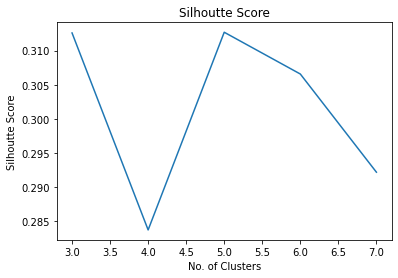

In [ ]:
no_of_clusters = [3,4,5,6,7]
plt.title("Silhoutte Score")
plt.xlabel("No. of Clusters") 
plt.ylabel("Silhoutte Score") 
plt.plot(no_of_clusters, sil_array)
plt.show()

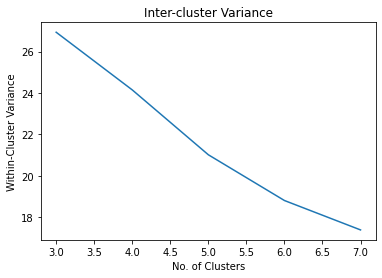

In [ ]:
plt.title("Inter-cluster Variance")
plt.xlabel("No. of Clusters") 
plt.ylabel("Within-Cluster Variance") 
plt.plot(no_of_clusters, inter_var_array)
plt.show()

### 5 Looks be the optimal number of clusters

In [ ]:
km = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter = 30)
km.fit(data_for_clustering)
cluster_labels = km.labels_

In [ ]:
cluster_labels = np.expand_dims(cluster_labels, axis = 1)
cluster_labels.shape

(753, 1)

In [ ]:
devices = np.expand_dims(daily_np[:,0], axis = 1)
devices_with_cluster_labels = np.concatenate((devices ,cluster_labels), axis=1)
devices_with_cluster_labels

array([['21:fa:27:56', 0],
       ['21:fa:27:82', 0],
       ['21:fa:29:50', 0],
       ...,
       ['ee:dd:4f:4c', 3],
       ['ee:dd:4f:57', 3],
       ['ee:dd:4f:cd', 1]], dtype=object)

In [ ]:
dtw(data_for_clustering[9], data_for_clustering[11])

7.717965856576285

In [ ]:
np.savetxt("/content/drive/MyDrive/DATA3001 Cyber/WeekendDeviceWithClusterLabelsHourly.csv", devices_with_cluster_labels, delimiter=",", fmt='%s')

In [ ]:
# visualisation of DTW using two devices from our dataset
s1 = eval(daily_np[57][1])
s2 = eval(daily_np[750][1])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)

AttributeError: ignored

In [ ]:
# takes rows of above numpy array as argument
# this will be used as our distance metric for clustering
def DTW(dev1, dev2):

  DTW_sum = 0

  for i in range(1,len(dev1)):
    DTW_sum += dtaidistance.dtw.distance(eval(dev1[i]), eval(dev2[i]))
    #if you want to use tslearn lib, replace it with dtw(), gives same result
   # path = dtw.warping_path(eval(dev1[i]), eval(dev2[i]))
  #dtwvis.plot_warping(eval(dev1[i]), eval(dev2[i]), path, filename="warp.png")    

  return DTW_sum


In [ ]:
# testing tslearn
s1 = np.concatenate((eval(daily_np[1][1]),eval(daily_np[1][2]),eval(daily_np[1][3]),eval(daily_np[1][4])), axis = 0)
s2 = np.concatenate((eval(daily_np[99][1]),eval(daily_np[99][2]),eval(daily_np[99][3]),eval(daily_np[99][4])), axis = 0)
print(dtw(s1, s2))
s1.shape

1.6003982745895282


(60,)

In [ ]:
# testing tslearn
s1 = np.concatenate((eval(daily_np[1][1])))
s2 = np.concatenate((eval(daily_np[99][1]),eval(daily_np[99][2])))
dtw(s1, s2)

ValueError: ignored

In [ ]:
DTW(daily_np[57], daily_np[750])

3.066573589737781

In [ ]:
#!pip install tslearn
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 6.8 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
s1 = [[5,4],[20,12], [12,100]]
s2 = np.array([[22,3],[6,7], [66,7]])
print(s2.shape)
print(dtw(s1,s2))

s5 = [5,4]
s6 = [22,3]
dtw_5_6 = dtw(s5,s6)
print(dtw_5_6)

s7 = [20,12]
s8 = [6,7]
dtw_7_8 = dtw(s7,s8)
print(dtw_7_8)

s9 = [12,100]
s10 = [66,7]
dtw_9_10 = dtw(s9,s10)
print(dtw_9_10)

print(type(s1))
#print(s1.shape, s2.shape)

print(math.sqrt(dtw_5_6**2 + dtw_7_8**2 + dtw_9_10**2))

s1 = [s5, s7, s9]
print(len(s1), len(s1[0]))

print(dtw(s1,s2))

(3, 2)
109.89085494252923
17.029386365926403
14.866068747318506
107.54068997360952
<class 'list'>
109.89085494252922
3 2
109.89085494252923


In [ ]:
kMeds = KMedoids(n_clusters=3, init='heuristic', metric=DTW)
kMeds.fit(daily_np)

ValueError: ignored